In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/NCI60_X.csv',index_col=0)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,-0.244980,...,-0.590020,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000
V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,-0.084981,...,0.189980,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000
V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,-0.244980,...,-0.210019,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000
V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,-0.114980,...,0.089980,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000
V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,1.145019,...,0.299980,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [4]:
x_raw = df.copy()

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Standard scaling all columns

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

creating 4 kmeans clusters

In [7]:
kmc = KMeans(n_clusters=4)
kmc.fit(x_scaled)

KMeans(n_clusters=4)

creating 4 agglomerative clusters

In [8]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(x_scaled)

AgglomerativeClustering(n_clusters=4)

In [9]:
kmc_score = silhouette_score(x_scaled, kmc.labels_, metric = 'euclidean')
agg_score = silhouette_score(x_scaled, agg.labels_, metric = 'euclidean')

In [10]:
from sklearn.decomposition import PCA

Reducing features to 25 principal components

In [11]:
pca = PCA(n_components=25)
x_scaled_pca = pca.fit_transform(x_scaled)

In [12]:
scaled_pca_df = pd.DataFrame(x_scaled_pca)
scaled_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.837922,-3.556709,-9.813077,-0.829050,12.603045,7.487612,14.184651,-3.187169,22.047830,-20.734430,...,-6.547890,19.478629,10.254629,8.420043,4.570476,-7.030686,-8.683078,-11.872395,12.781880,-9.188400
1,-23.089265,-6.440586,-13.479945,5.633946,8.039835,3.704302,10.110062,-7.357792,22.412886,-13.837204,...,5.249472,18.639120,6.333310,11.088491,16.290213,2.422432,-9.334830,-5.383187,10.759745,-4.855262
2,-27.456089,-2.465385,-3.532241,-1.357396,12.558320,17.350768,10.370434,-2.648433,-0.234753,-6.768361,...,-7.864411,12.211726,-1.140433,-2.529523,5.858554,-0.633083,7.693193,4.148859,0.709215,-2.544320
3,-42.816808,9.767721,-0.889045,3.442682,42.255995,27.235973,17.557540,-0.530678,14.211893,16.508761,...,-20.692524,-3.228257,0.788916,2.511039,-0.814866,8.269260,-17.192431,-6.276947,-16.952846,7.839527
4,-55.418670,5.200681,-21.096149,15.847014,10.467658,12.970534,12.552774,32.386505,-7.855514,-10.455047,...,-3.841573,-20.169211,-18.277404,-3.695341,4.138593,4.249357,8.709447,-6.531621,-11.041868,-16.132223
5,-27.178090,-6.779642,-21.816109,13.844911,-7.991001,0.707358,27.980747,31.244623,-10.915576,1.328298,...,-16.990854,-3.111948,9.526480,-6.144143,-29.210547,-5.883147,-7.908163,8.018439,2.873421,25.047959
6,-31.446156,-3.862969,-30.352621,41.688820,-10.412839,-17.011885,23.724993,-0.915725,14.063038,-8.255355,...,14.300186,-15.433822,-10.368090,13.548530,9.955911,-12.399419,-1.219155,-7.130827,7.811213,5.192214
7,-22.332538,-10.395151,-18.755855,6.974779,5.542044,11.705361,11.761207,22.794015,-3.752483,-5.006886,...,9.965470,17.680005,-2.896586,-5.838182,-8.784883,27.856169,1.367292,3.238011,-18.934644,-8.430080
8,-14.289788,-16.111027,-19.758178,6.576967,3.781135,-8.011857,-13.098951,7.209085,0.912752,-8.181110,...,-6.353896,2.188336,-7.653406,0.262557,-3.645477,-11.728830,14.968153,-1.365514,1.771626,-9.589869
9,-29.748111,-23.993437,-5.884051,-10.014191,-3.450814,11.706664,0.557858,8.059077,-20.051653,-27.663877,...,12.290105,-8.114928,38.784286,-13.979516,17.736099,9.456580,28.975614,5.694518,4.092431,14.522182


In [13]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.11358942 0.06756202 0.05751842 0.04247547 0.03734964 0.03618621
 0.03066211 0.02685837 0.0252933  0.02375098 0.0235542  0.02163616
 0.02047736 0.01976946 0.01914633 0.01769217 0.01659276 0.01605762
 0.01588125 0.01557134 0.01497665 0.01474998 0.01428692 0.01356469
 0.01309162]
0.7182944736449139


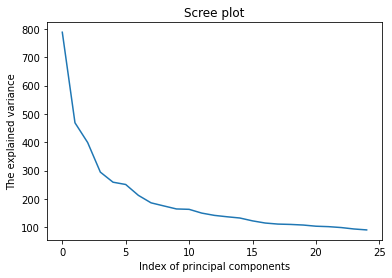

In [14]:
ax = sns.lineplot(pca.explained_variance_)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance")
plt.show()

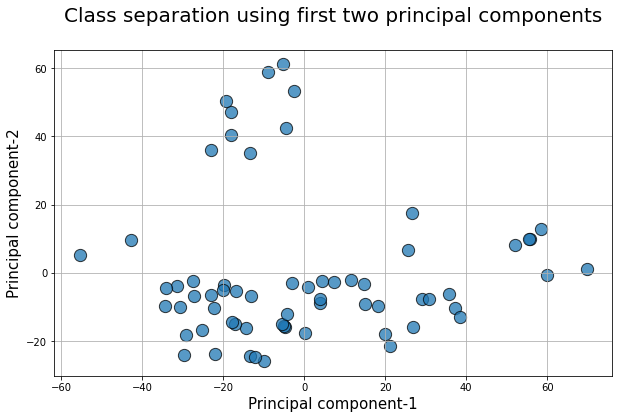

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled_pca[:,0],x_scaled_pca[:,1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

creating 4 kmeans clusters on pca reduced dataset

In [16]:
kmc_pca = KMeans(n_clusters=4)
kmc_pca.fit(x_scaled_pca)

KMeans(n_clusters=4)

creating 4 agglomerative clusters on pca reduced dataset

In [17]:
agg_pca = AgglomerativeClustering(n_clusters=4)
agg_pca.fit(x_scaled_pca)

AgglomerativeClustering(n_clusters=4)

In [18]:
kmc_score_pca = silhouette_score(x_scaled_pca, kmc_pca.labels_, metric = 'euclidean')
agg_score_pca = silhouette_score(x_scaled_pca, agg_pca.labels_, metric = 'euclidean')

## Comparing scores

In [19]:
comparison = (('Raw Data', kmc_score, agg_score),
      ('PCA reduced', kmc_score_pca, agg_score_pca))

In [20]:
comparison_df = pd.DataFrame(comparison, columns = ["Dataset", "KMeans", "Agglomerative"])
comparison_df.set_index('Dataset', inplace=True)
comparison_df

,KMeans,Agglomerative
Dataset,,
Raw Data,0.072993,0.076382
PCA reduced,0.141810,0.127651


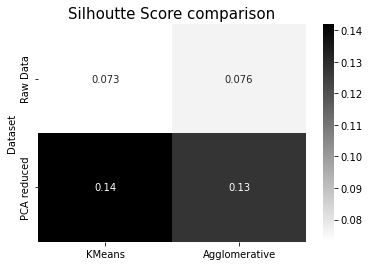

In [21]:
sil_comparison = sns.heatmap(comparison_df,cmap='binary', annot=True)
sil_comparison.set_title("Silhoutte Score comparison",fontsize=15)
plt.show()

Therefore K means clustering on PCA reduced dataset gives the best score

### Plotting Comparison

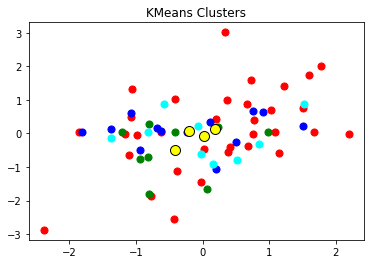

In [22]:
y_kmc = kmc.fit_predict(x_scaled)
plt.scatter(x_scaled[y_kmc==0, 0], x_scaled[y_kmc==0, 1], s=50, c='red', label ='KMC Cluster 1')
plt.scatter(x_scaled[y_kmc==1, 0], x_scaled[y_kmc==1, 1], s=50, c='blue', label ='KMC Cluster 2')
plt.scatter(x_scaled[y_kmc==2, 0], x_scaled[y_kmc==2, 1], s=50, c='green', label ='KMC Cluster 3')
plt.scatter(x_scaled[y_kmc==3, 0], x_scaled[y_kmc==3, 1], s=50, c='cyan', label ='KMC Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids KMC')
plt.title('KMeans Clusters')
plt.show()

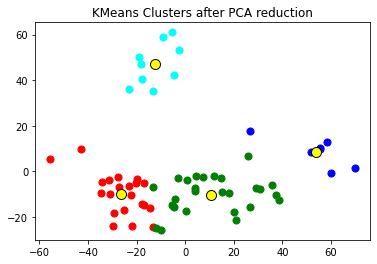

In [23]:
y_kmc_pca = kmc_pca.fit_predict(x_scaled_pca)
plt.scatter(x_scaled_pca[y_kmc_pca==0, 0], x_scaled_pca[y_kmc_pca==0, 1], s=50, c='red', label ='KMC PCA Cluster 1')
plt.scatter(x_scaled_pca[y_kmc_pca==1, 0], x_scaled_pca[y_kmc_pca==1, 1], s=50, c='blue', label ='KMC PCA Cluster 2')
plt.scatter(x_scaled_pca[y_kmc_pca==2, 0], x_scaled_pca[y_kmc_pca==2, 1], s=50, c='green', label ='KMC PCA Cluster 3')
plt.scatter(x_scaled_pca[y_kmc_pca==3, 0], x_scaled_pca[y_kmc_pca==3, 1], s=50, c='cyan', label ='KMC PCA Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc_pca.cluster_centers_[:, 0], kmc_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids KMC PCA')
plt.title('KMeans Clusters after PCA reduction')
plt.show()

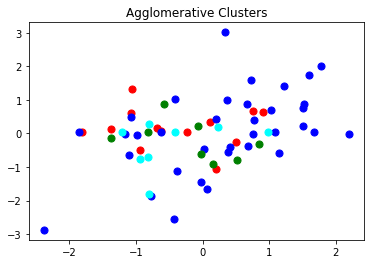

In [24]:
y_agg = agg.fit_predict(x_scaled)
plt.scatter(x_scaled[y_agg==0, 0], x_scaled[y_agg==0, 1], s=50, c='red', label ='Agg Cluster 1')
plt.scatter(x_scaled[y_agg==1, 0], x_scaled[y_agg==1, 1], s=50, c='blue', label ='Agg Cluster 2')
plt.scatter(x_scaled[y_agg==2, 0], x_scaled[y_agg==2, 1], s=50, c='green', label ='Agg Cluster 3')
plt.scatter(x_scaled[y_agg==3, 0], x_scaled[y_agg==3, 1], s=50, c='cyan', label ='Agg Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(agg.cluster_centers_[:, 0], agg.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids Agg')
plt.title('Agglomerative Clusters')
plt.show()

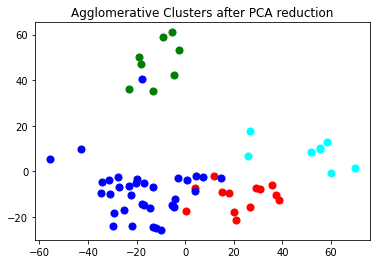

In [25]:
y_agg_pca = agg_pca.fit_predict(x_scaled_pca)
plt.scatter(x_scaled_pca[y_agg_pca==0, 0], x_scaled_pca[y_agg_pca==0, 1], s=50, c='red', label ='Agg PCA Cluster 1')
plt.scatter(x_scaled_pca[y_agg_pca==1, 0], x_scaled_pca[y_agg_pca==1, 1], s=50, c='blue', label ='Agg PCA Cluster 2')
plt.scatter(x_scaled_pca[y_agg_pca==2, 0], x_scaled_pca[y_agg_pca==2, 1], s=50, c='green', label ='Agg PCA Cluster 3')
plt.scatter(x_scaled_pca[y_agg_pca==3, 0], x_scaled_pca[y_agg_pca==3, 1], s=50, c='cyan', label ='Agg PCA Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(agg_pca.cluster_centers_[:, 0], agg_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids Agg PCA')
plt.title('Agglomerative Clusters after PCA reduction')
plt.show()